In [201]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("experiment_lesson_4.csv")

In [6]:
# check null values
df.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [8]:
# check shape
df.shape

(20196, 4)

In [10]:
# check dtypes
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [14]:
# check head
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [139]:
# plot distribution of two groups
group_A = df[df.experiment_group == 'control']
group_B = df[df.experiment_group == 'test']

Text(0.5, 1.0, 'Test')

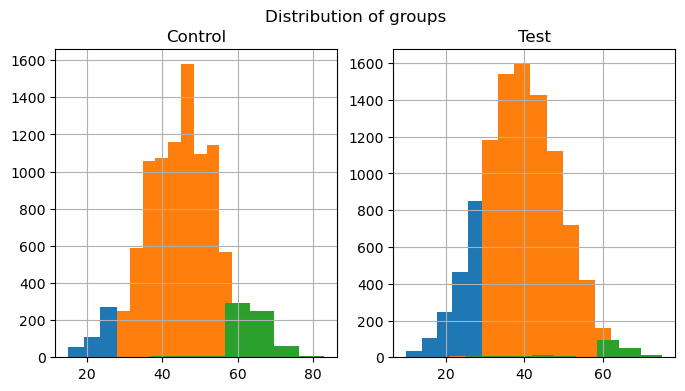

In [195]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle('Distribution of groups')

group_A.groupby('district').delivery_time.hist(ax=axes[0])
axes[0].set_title('Control')
group_B.groupby('district').delivery_time.hist(ax=axes[1])
axes[1].set_title('Test')

In [206]:
# whether the number of observations differs in each group?
np.abs(group_A.order_id.count() - group_B.order_id.count())

12

In [229]:
# check normality of both groups
# control group
stats.normaltest(group_A.delivery_time)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [230]:
# test group
stats.normaltest(group_B.delivery_time)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [231]:
# values of the control group came from normal distribution 
# values of the test group didn't come from normal distribution 

In [217]:
round(np.std(group_A.delivery_time),2)

9.99

In [218]:
round(np.std(group_B.delivery_time),2)

9.88

In [225]:
# conduct t-test
stats.ttest_ind(group_A.delivery_time, group_B.delivery_time)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

In [ ]:
# we accept H1

In [240]:
round((np.mean(group_B.delivery_time) - np.mean(group_A.delivery_time)) / np.mean(group_A.delivery_time) * 100, 2)

-13.35

In [241]:
# The average delivery time has changed statistically significantly, so a new algorithm should be implemented